# Models

Firstly, we need to import the libraries we will use.

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Secondly, we need to load the data.

In [126]:
train = pd.read_csv('train_engineered.csv')
test = pd.read_csv('test_engineered.csv')

In [127]:
# print the title of each column of the train dataset
print(train.columns.values)

['Unnamed: 0' 'belongs_to_collection' 'budget_processed' 'genre_rank'
 'num_genres' 'has_homepage' 'originally_english' 'topStudio'
 'numTopStudios' 'num_studios' 'studioRank' 'num_production_countries'
 'topCountry' 'countryRank' 'usa_produced' '1960s' '1970s' '1980s' '1990s'
 '2000s' '2010s' 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease'
 'thursdayRelease' 'fridayRelease' 'saturdayRelease' 'sundayRelease'
 'Winter' 'Fall' 'Spring' 'Summer' 'runtime_processed' 'spoken_english'
 'num_languages' 'has_tagline' 'num_keywords' 'numTopKeywords'
 'keywordRank' 'cast_num' 'topLeadActor' 'numTopActors' 'actorRanks'
 'topActorRank' 'crew_num' 'topLeadDirector' 'numTopDirectors'
 'directorsRank' 'topLeadExecProd' 'numTopExecProd' 'execProdRank'
 'topLeadProducer' 'numTopProducers' 'producersRank' 'topLeadComposer'
 'numTopComposers' 'composersRank' 'topLeadDirectorPhoto'
 'numTopDirectorsPhoto' 'directorsPhotoRank' 'topLeadEditor'
 'numTopEditors' 'editorsRank' 'budget_to_year_ratio'
 'runt

In [128]:
# print the title of each column of the test dataset
print(test.columns.values)

['Unnamed: 0' 'belongs_to_collection' 'budget_processed' 'genre_rank'
 'num_genres' 'has_homepage' 'originally_english' 'topStudio'
 'numTopStudios' 'num_studios' 'studioRank' 'num_production_countries'
 'topCountry' 'countryRank' 'usa_produced' '1960s' '1970s' '1980s' '1990s'
 '2000s' '2010s' 'mondayRelease' 'tuesdayRelease' 'wednesdayRelease'
 'thursdayRelease' 'fridayRelease' 'saturdayRelease' 'sundayRelease'
 'Winter' 'Fall' 'Spring' 'Summer' 'runtime_processed' 'spoken_english'
 'num_languages' 'has_tagline' 'num_keywords' 'numTopKeywords'
 'keywordRank' 'cast_num' 'topLeadActor' 'numTopActors' 'actorRanks'
 'topActorRank' 'crew_num' 'topLeadDirector' 'numTopDirectors'
 'directorsRank' 'topLeadExecProd' 'numTopExecProd' 'execProdRank'
 'topLeadProducer' 'numTopProducers' 'producersRank' 'topLeadComposer'
 'numTopComposers' 'composersRank' 'topLeadDirectorPhoto'
 'numTopDirectorsPhoto' 'directorsPhotoRank' 'topLeadEditor'
 'numTopEditors' 'editorsRank' 'budget_to_year_ratio'
 'runt

In [129]:
train['log_budget']=np.log1p(train['budget_processed'])
test['log_budget']=np.log1p(test['budget_processed'])

## Error Detection Models
Error Detection Models are used to detect errors in the dataset. It is a classier that classifies the data into two classes: error and non-error. We will use lightgbm as our error detection model.

### 1. data preparation

Firstly, we need to prepare the data for the error detection model. We will use the data from the previous notebook. By plotting the distribution of the data, we can see seperation between the error and non-error data by recognizing the outliers and abnormal data.

C:\Users\zjy\AppData\Local\Temp\ipykernel_14676\4229348723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['revenue'], kde=False)


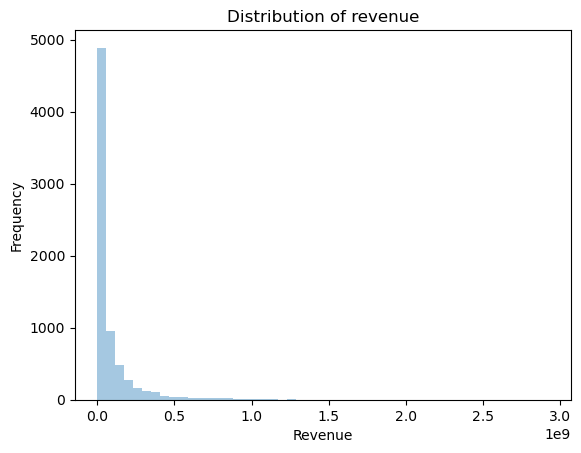

In [130]:
#plot the distribution of the revenue in the training set
sns.distplot(train['revenue'], kde=False)
plt.title('Distribution of revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_14676\839752103.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['budget_processed'], kde=False)


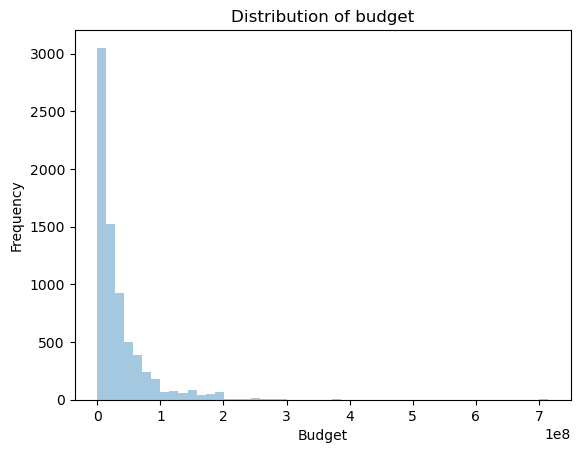

In [131]:
#plot the distribution of the budget in the training set
sns.distplot(train['budget_processed'], kde=False)
plt.title('Distribution of budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_14676\668996526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_revenue'], kde=False)


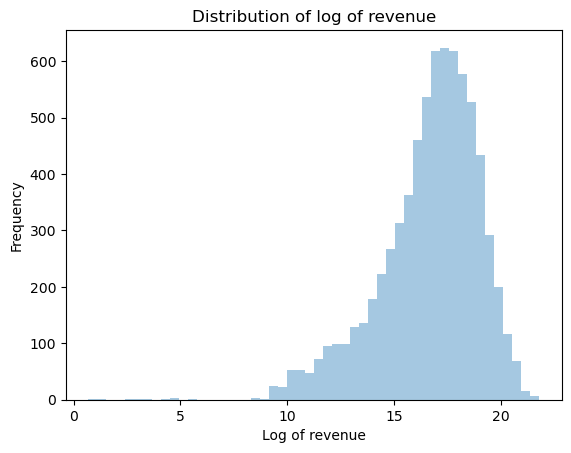

In [132]:
# plot the distribution of the log of the revenue in the training set
sns.distplot(train['log_revenue'], kde=False)
plt.title('Distribution of log of revenue')
plt.xlabel('Log of revenue')
plt.ylabel('Frequency')
plt.show()

C:\Users\zjy\AppData\Local\Temp\ipykernel_14676\3171513416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['log_budget'], kde=False)


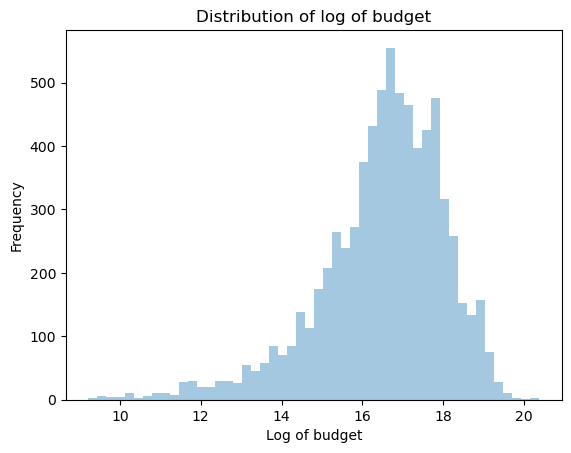

In [133]:
# plot the distribution of the log of the budget in the training set
sns.distplot(train['log_budget'], kde=False)
plt.title('Distribution of log of budget')
plt.xlabel('Log of budget')
plt.ylabel('Frequency')
plt.show()

By seeing the graph above, we will divide the data into two parts: error and non-error and label them as 1 and 0 respectively. We will use these labels to train the error detection model.

In [134]:
#store all the data that is zero in budget or revenue in a new dataframe called error
#store all the data that is not zero in budget or revenue in a new dataframe called non_error_train
error_train = train[(train['revenue'] == 0) | (train['budget_processed'] == 0)]
non_error_train = train[(train['budget_processed'] != 0) & (train['revenue'] != 0)]
#move all the data whose log_budegt is less than 10 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_budget'] < 10]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_budget'] >= 10]
#move all the data whose log_revenue is less than 7.5 in non-error to the error dataframe
temp = non_error_train[non_error_train['log_revenue'] < 7.5]
error_train = error_train._append(temp, ignore_index=True)
non_error_train = non_error_train[non_error_train['log_revenue'] >= 7.5]

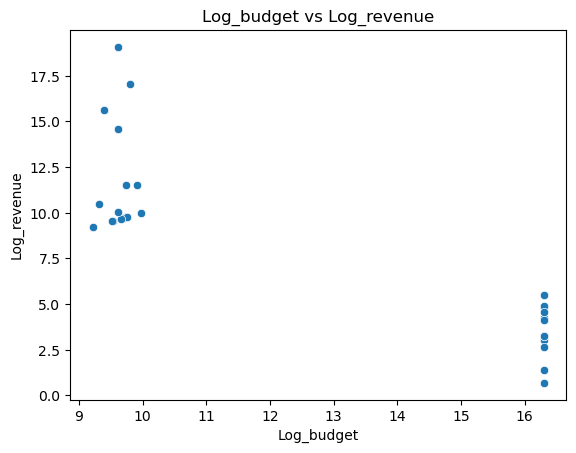

In [135]:
#plot the distribution of the log_budegt against the log_revenue in the error set
sns.scatterplot(x='log_budget', y='log_revenue', data=error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

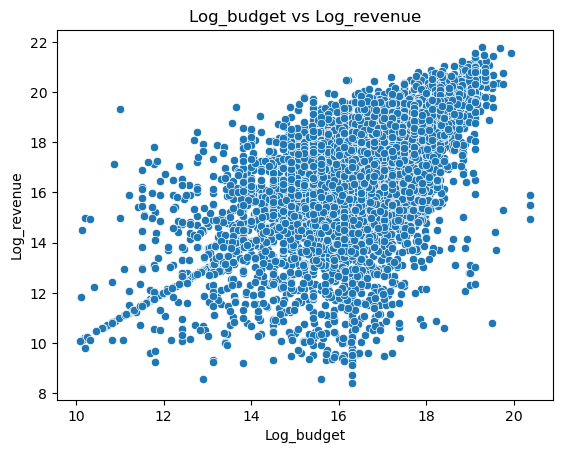

In [136]:
#plot the distribution of the log_budegt against the log_revenue in the non-error set
sns.scatterplot(x='log_budget', y='log_revenue', data=non_error_train)
plt.title('Log_budget vs Log_revenue')
plt.xlabel('Log_budget')
plt.ylabel('Log_revenue')
plt.show()

In [137]:
#label the error set as 1 and the non-error set as 0
error_train['error'] = 1
non_error_train['error'] = 0
#combine the error and non-error set
train_labeled = error_train._append(non_error_train, ignore_index=True)

In [138]:
# split the training set into training and validation set, with a evenly distributed error and non-error set
train_labeled, val_labeled = train_test_split(train_labeled, test_size=0.2, random_state=42, stratify=train_labeled['error'])

### 2. training

In [159]:
# feature_classification selection
feature_classification =
target = 'error'

# split the feature_classification and target in the training set
X_train = train_labeled[feature_classification]
y_train = train_labeled[target]
# split the feature_classification and target in the validation set
X_val = val_labeled[feature_classification]
y_val = val_labeled[target]

# create a lgb dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
# create a lgb dataset for validation
val_data = lgb.Dataset(X_val, label=y_val)

# set the parameters for the lgb model
param = {'num_leaves': 30,
          'objective': 'binary',
          'metric': 'auc',
          'max_depth': 5,
          'learning_rate': 0.1,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 1,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_error_detection = lgb.train(param, train_data, valid_sets=[val_data])

# predict the validation set
y_pred = lgb_error_detection.predict(X_val, num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# calculate the accuracy, precision, recall and f1 score
accuracy = sum(y_pred == y_val) / len(y_val)
print(accuracy)
precision = sum((y_pred == 1) & (y_val == 1)) / sum(y_pred == 1)
print(precision)
recall = sum((y_pred == 1) & (y_val == 1)) / sum(y_val == 1)
print(recall)
f1 = 2 * precision * recall / (precision + recall)
print(f1)

KeyError: "['runtime', 'release_year', 'release_month', 'release_day'] not in index"

### 3. save the model

In [140]:
# save the model
lgb_error_detection.save_model('model/lgb_error_detection.pkl')

### 4. prediction

In [141]:
# predict the test set
y_pred = lgb_error_detection.predict(test[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
test['error'] = y_pred

In [142]:
# predict the error set using the error detection model
y_pred = lgb_error_detection.predict(error_train[feature_classification], num_iteration=lgb_error_detection.best_iteration)
# convert the prediction to binary
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
error_train['error'] = y_pred

# split the test set into error and non-error set
error_test = test[test['error'] == 1]
non_error_test = test[test['error'] == 0]

In [143]:
print(error_test.shape)
print(non_error_test.shape)

(1, 71)
(4397, 71)


## Models for revenue prediction

### 1. Model for error-free data

we will use 3 models: lightgbm, xgboost, and catboost. Then we will use the average of the predictions of these models as our final prediction.

Use Five-Fold Cross Validation to Evaluate the Model

In [144]:
# split the training set into training and validation set, use Five-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# feature selection
feature_regression = ['runtime_to_year_ratio','inflationBudget','popularity','popularity_year_ratio','num_keywords','budget_processed','log_budget']
target = 'revenue'

In [145]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 10,
          'objective': 'binary',
          'metric': 'auc',
          'max_depth': 5,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 1,
          'lambda_l2': 1,
          'verbose': -1}
# train the lgb model
lgb_model_non_error = []
lgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_non_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)



194248680.44005525
195997421.35032627
190337317.9611135
188595684.85689688
214980988.3732832


In [146]:
# xgboost
# set the parameters for the xgb model
param = {'max_depth': 8, 'eta': 0.2, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
# train the xgb model
xgb_model_non_error = []
xgb_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_non_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:170266446.87403
[1]	validation-rmse:152477446.17821
[2]	validation-rmse:141276438.82708
[3]	validation-rmse:132040131.97897
[4]	validation-rmse:125102384.56634
[5]	validation-rmse:121718386.11615
[6]	validation-rmse:120027379.98558
[7]	validation-rmse:119494858.33694
[8]	validation-rmse:119205193.14934
[9]	validation-rmse:118605818.05336
118605818.53950918
[0]	validation-rmse:171661260.85882
[1]	validation-rmse:154049828.15011
[2]	validation-rmse:141218573.07155
[3]	validation-rmse:132715606.71151
[4]	validation-rmse:125848369.52561
[5]	validation-rmse:121017062.98204
[6]	validation-rmse:117319765.51851
[7]	validation-rmse:113924935.57396
[8]	validation-rmse:111245790.98054
[9]	validation-rmse:109829633.97168
109829635.26390223
[0]	validation-rmse:167444993.76453
[1]	validation-rmse:150999869.23816
[2]	validation-rmse:136702019.42268
[3]	validation-rmse:129621110.03413
[4]	validation-rmse:125001348.49017
[5]	validation-rmse:120598999.02587
[6]	validation-rmse:118544

d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

114858973.49850926
[0]	validation-rmse:165306513.27776
[1]	validation-rmse:147914140.14919
[2]	validation-rmse:137198086.13085
[3]	validation-rmse:129700477.39057
[4]	validation-rmse:123617173.65906
[5]	validation-rmse:120035702.59043
[6]	validation-rmse:117343571.23177
[7]	validation-rmse:116195943.12258
[8]	validation-rmse:115347116.33841
[9]	validation-rmse:115438383.39387
115438382.23003547
[0]	validation-rmse:189585590.13596
[1]	validation-rmse:169798209.65116
[2]	validation-rmse:156781045.24028
[3]	validation-rmse:146330272.94997
[4]	validation-rmse:138835078.44029
[5]	validation-rmse:133210208.41314
[6]	validation-rmse:128503331.85332
[7]	validation-rmse:126020464.51024
[8]	validation-rmse:124400417.61107
[9]	validation-rmse:122767896.38069
122767895.41576047


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [147]:
# catboost
# set the parameters for the cat model
param = {'iterations': 110, 'learning_rate': 0.1, 'eval_metric': 'RMSE'}
# train the cat model
cat_model_non_error = []
cat_prediction = []
for train_index, val_index in kf.split(non_error_train):
    X_train, X_val = non_error_train.iloc[train_index][feature_regression], non_error_train.iloc[val_index][feature_regression]
    y_train, y_val = non_error_train.iloc[train_index][target], non_error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_non_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)

0:	learn: 168567962.6596033	test: 166774062.8833802	best: 166774062.8833802 (0)	total: 2.58ms	remaining: 281ms
1:	learn: 160357178.5970122	test: 158915735.0426799	best: 158915735.0426799 (1)	total: 5.03ms	remaining: 272ms
2:	learn: 153106788.2767662	test: 151765548.8169734	best: 151765548.8169734 (2)	total: 7.3ms	remaining: 261ms
3:	learn: 146838097.7487078	test: 145803923.9130655	best: 145803923.9130655 (3)	total: 9.4ms	remaining: 249ms
4:	learn: 141367407.6549856	test: 140223013.3204624	best: 140223013.3204624 (4)	total: 11.4ms	remaining: 239ms
5:	learn: 136600183.8038461	test: 136117031.7522637	best: 136117031.7522637 (5)	total: 13.3ms	remaining: 231ms
6:	learn: 132442589.4091528	test: 132293204.0076660	best: 132293204.0076660 (6)	total: 15.3ms	remaining: 225ms
7:	learn: 128486183.0903385	test: 129327063.4540075	best: 129327063.4540075 (7)	total: 17.4ms	remaining: 222ms
8:	learn: 125184601.8588721	test: 126135261.9494610	best: 126135261.9494610 (8)	total: 19.6ms	remaining: 220ms
9:	

In [148]:
# train a linear regression model to adjust the prediction of the three models

# split the non-error training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(non_error_train[feature_regression], non_error_train[target], test_size=0.2, random_state=42)

def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

# predict the training set using the three models
lgb_train = prediction(lgb_model_non_error, X_train)
xgb_train = prediction(xgb_model_non_error, xgb.DMatrix(X_train))
cat_train = prediction(cat_model_non_error, cat.Pool(X_train))

# train a linear regression model to adjust the prediction of the three models
lr = LinearRegression()
lr.fit(np.array([lgb_train, xgb_train, cat_train]).T, y_train)

# predict the validation set using the three models
lgb_val = prediction(lgb_model_non_error, X_val)
xgb_val = prediction(xgb_model_non_error, xgb.DMatrix(X_val))
cat_val = prediction(cat_model_non_error, cat.Pool(X_val))

# predict the validation set using the linear regression model
y_pred = lr.predict(np.array([lgb_val, xgb_val, cat_val]).T)

# calculate the loss
loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
print(loss)




51999177.18725372


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

### 2. Model for error data

In [149]:
# lightgbm
# set the parameters for the lgb model
param = {'num_leaves': 10,
          'objective': 'binary',
          'metric': 'auc',
          'max_depth': 5,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'min_data_in_leaf': 5,
          'bagging_fraction': 0.9,
          'bagging_freq': 1,
          'lambda_l1': 1,
          'lambda_l2': 1,
          'verbose': -1}

# train the lgb model
lgb_model_error = []
lgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    lgb_model = lgb.train(param, train_data, valid_sets=[val_data])
    lgb_model_error.append(lgb_model)
    # evaluate the model
    y_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
    lgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


2449510.8779360764
10137075.206081452
42242.46166872065
33.12099032335839
86471354.49452835


In [150]:
# xgboost
# set the parameters for the xgb model
param = {'max_depth': 8, 'eta': 0.2, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
# train the xgb model
xgb_model_error = []
xgb_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = xgb.DMatrix(X_train, label=y_train)
    val_data = xgb.DMatrix(X_val, label=y_val)
    xgb_model = xgb.train(param, train_data, evals=[(val_data, 'validation')])
    xgb_model_error.append(xgb_model)
    # evaluate the model
    y_pred = xgb_model.predict(val_data)
    xgb_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)


[0]	validation-rmse:8258632.87359
[1]	validation-rmse:15190168.44945
[2]	validation-rmse:21525119.19653
[3]	validation-rmse:27250127.16857
[4]	validation-rmse:32411566.86932
[5]	validation-rmse:37061071.87570
[6]	validation-rmse:41247893.49023
[7]	validation-rmse:45017345.33674
[8]	validation-rmse:48410661.34076
[9]	validation-rmse:51465171.92099
51465171.72488725
[0]	validation-rmse:8231745.27520
[1]	validation-rmse:15791318.78933
[2]	validation-rmse:24195512.21594
[3]	validation-rmse:32057621.00650
[4]	validation-rmse:39229886.26081
[5]	validation-rmse:45726156.22264
[6]	validation-rmse:51593541.08994
[7]	validation-rmse:56885771.30856
[8]	validation-rmse:61655741.23336
[9]	validation-rmse:65953114.74007
65953117.182098664
[0]	validation-rmse:37640.14547
[1]	validation-rmse:33539.08569


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

[2]	validation-rmse:29912.20223
[3]	validation-rmse:26806.83138
[4]	validation-rmse:24025.82726
[5]	validation-rmse:21534.49713
[6]	validation-rmse:19302.23559
[7]	validation-rmse:17293.30527
[8]	validation-rmse:15485.10974
[9]	validation-rmse:13868.76831
13868.768448083689
[0]	validation-rmse:25.41114
[1]	validation-rmse:22.59647
[2]	validation-rmse:27.51837
[3]	validation-rmse:31.26921
[4]	validation-rmse:35.01965
[5]	validation-rmse:38.53617
[6]	validation-rmse:41.38419
[7]	validation-rmse:43.97459
[8]	validation-rmse:46.30555
[9]	validation-rmse:48.39625
48.396247690439054
[0]	validation-rmse:86230179.03227
[1]	validation-rmse:86228871.94213
[2]	validation-rmse:86227793.49825
[3]	validation-rmse:86226943.68587
[4]	validation-rmse:86226208.19956
[5]	validation-rmse:86225362.19523
[6]	validation-rmse:86224630.61690
[7]	validation-rmse:86223993.68809
[8]	validation-rmse:86223441.41768
[9]	validation-rmse:86222968.76184
86222963.35627457


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

In [151]:
# catboost
# set the parameters for the cat model
param = {'iterations': 110, 'learning_rate': 0.1, 'eval_metric': 'RMSE'}
# train the cat model
cat_model_error = []
cat_prediction = []
for train_index, val_index in kf.split(error_train):
    X_train, X_val = error_train.iloc[train_index][feature_regression], error_train.iloc[val_index][feature_regression]
    y_train, y_val = error_train.iloc[train_index][target], error_train.iloc[val_index][target]
    train_data = cat.Pool(X_train, label=y_train)
    val_data = cat.Pool(X_val, label=y_val)
    cat_model = cat.CatBoostRegressor(**param)
    cat_model.fit(train_data, eval_set=val_data)
    cat_model_error.append(cat_model)
    # evaluate the model
    y_pred = cat_model.predict(val_data)
    cat_prediction.append(y_pred)
    # calculate the loss
    loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
    print(loss)
    

0:	learn: 39304294.5446213	test: 9092671.4356614	best: 9092671.4356614 (0)	total: 568us	remaining: 61.9ms
1:	learn: 38286218.8092900	test: 8939367.8932926	best: 8939367.8932926 (1)	total: 1.12ms	remaining: 60.3ms
2:	learn: 37282360.3800739	test: 9693918.6207176	best: 8939367.8932926 (1)	total: 1.56ms	remaining: 55.6ms
3:	learn: 36335912.5721929	test: 9975514.9993646	best: 8939367.8932926 (1)	total: 2.06ms	remaining: 54.6ms
4:	learn: 35403941.0705982	test: 10385752.4607487	best: 8939367.8932926 (1)	total: 2.43ms	remaining: 51ms
5:	learn: 34487763.8084493	test: 10189349.0784520	best: 8939367.8932926 (1)	total: 2.85ms	remaining: 49.5ms
6:	learn: 33598404.7347753	test: 9933883.1104806	best: 8939367.8932926 (1)	total: 3.28ms	remaining: 48.3ms
7:	learn: 32710874.2313773	test: 9499912.4033572	best: 8939367.8932926 (1)	total: 3.54ms	remaining: 45.2ms
8:	learn: 31869462.5503838	test: 9344157.8958292	best: 8939367.8932926 (1)	total: 3.98ms	remaining: 44.6ms
9:	learn: 31038223.5750416	test: 90655

In [152]:
# train a linear regression model to adjust the prediction of the three models

# split the error training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(error_train[feature_regression], error_train[target], test_size=0.2, random_state=42)

def prediction(model, data):
    pred = []
    for i in range(len(model)):
        pred.append(model[i].predict(data))
    pred = np.array(pred)
    pred = np.mean(pred, axis=0)
    return pred

# predict the training set using the three models
lgb_train = prediction(lgb_model_error, X_train)
xgb_train = prediction(xgb_model_error, xgb.DMatrix(X_train))
cat_train = prediction(cat_model_error, cat.Pool(X_train))

# train a linear regression model to adjust the prediction of the three models
lr = LinearRegression()
lr.fit(np.array([lgb_train, xgb_train, cat_train]).T, y_train)

# predict the validation set using the three models
lgb_val = prediction(lgb_model_error, X_val)
xgb_val = prediction(xgb_model_error, xgb.DMatrix(X_val))
cat_val = prediction(cat_model_error, cat.Pool(X_val))

# predict the validation set using the linear regression model
y_pred = lr.predict(np.array([lgb_val, xgb_val, cat_val]).T)

# calculate the loss
loss = np.sqrt(sum((y_pred - y_val) ** 2) / len(y_val))
print(loss)

2529073.30151702


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\L

## Prediction

### 1. Prediction for error-free data

In [153]:
# predict the non-error set using the three models
lgb_non_error = prediction(lgb_model_non_error, non_error_test[feature_regression])
xgb_non_error = prediction(xgb_model_non_error, xgb.DMatrix(non_error_test[feature_regression]))
cat_non_error = prediction(cat_model_non_error, cat.Pool(non_error_test[feature_regression]))

# predict the non-error set using the linear regression model
y_pred = lr.predict(np.array([lgb_non_error, xgb_non_error, cat_non_error]).T)
non_error_test['revenue'] = y_pred

# predict the error set using the three models
lgb_error = prediction(lgb_model_error, error_test[feature_regression])
xgb_error = prediction(xgb_model_error, xgb.DMatrix(error_test[feature_regression]))
cat_error = prediction(cat_model_error, cat.Pool(error_test[feature_regression]))

# predict the error set using the linear regression model
y_pred = lr.predict(np.array([lgb_error, xgb_error, cat_error]).T)
error_test['revenue'] = y_pred


d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
d:\anaconda3\envs\F30\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\zjy\AppData\Lo

In [154]:
# combine the error and non-error set
test = error_test._append(non_error_test, ignore_index=True)

In [155]:
df_sub = pd.DataFrame()
sub= ['id','revenue']
df_sub[sub]=test[sub]
df_sub.to_csv("submission1.csv", index=False)